# Bases de datos en Python

## Índice
1. [Acceso a bases de datos relacionales](#sql)
2. [Crear bases de datos relacionales](#crear)

<a id="sql"></a>
## Acceso a bases de datos relacionales

Podemos acceder a bases de datos SQL con la librería `pymysql`. Para instalarla escribimos en Anaconda Prompt:  
`conda install -c anaconda pymysql`

#### Ejemplo 1
Vamos a conectarnos a la base de datos NBA, que contiene estadísticas de partidos de una temporada.  
Utilizaremos los siguientes parámetros:  
* servidor: relational.fit.cvut.cz
* usuario: guest
* contraseña: relational  
* base de datos: NBA  

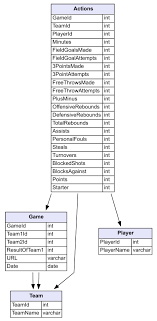

Vamos a crear una conexión con la base de datos

In [ ]:
database_host = 'relational.fit.cvut.cz'
username = 'guest'
password = 'relational'
database_name = 'NBA'

db = pymysql.connect(host=database_host,
                     user=username,
                     password=password,
                     database=database_name)
cursor = db.cursor()

La función `connect()` crea una conexión a la base de datos. Un *cursor* nos permite realizar operaciones con los datos almacenados en la base de datos. 

<img src='https://i.ibb.co/L8HH0G5/cursor.png'>  

Una vez creado el cursor, podemos empezar a ejecutar comandos sobre el contenido de la base de datos utilizando el métido `execute()`,

Al ejecutar queries, utilizamos los métodos `fetchone()` (primera fila) o `fectchall()` (todas las filas) para visizar los resultados de las consultas. Para cerrar la conexión, utilizamso el método `close()`

Podemos ver las tablas de la base de datos con la query `SHOW TABLES`

La función `read_sql()` de pandas nos permite crear dataframes a partir de queries. Con este método no es necesario crear un cursor

Obtenemos los jugadores con más de 5 asistencias en algún partido

Obtenemos el TOP 10 jugadores con más asistencias en la temporada

Obtenemos el TOP 10 Equipos con más puntuación media por partido

#### Ejemplo 2
Vamos a conectarnos a la base de datos de los empleados de una empresa  
* servidor: relational.fit.cvut.cz
* usuario: guest
* contraseña: relational  
* base de datos: employees

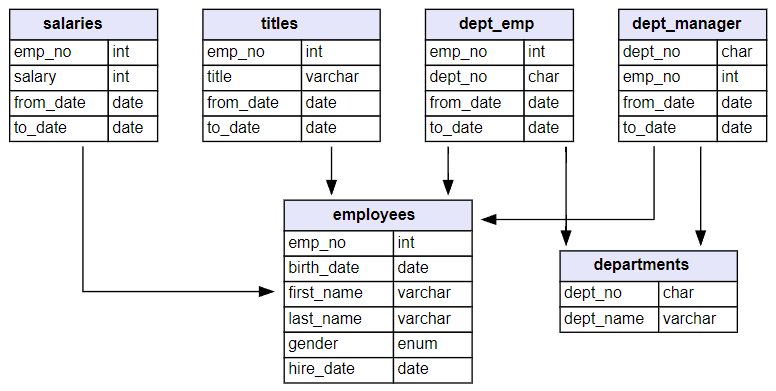

In [ ]:
database_host = 'relational.fit.cvut.cz'
username = 'guest'
password = 'relational'
database_name = 'employee'

db = pymysql.connect(host=database_host,
                     user=username,
                     password=password,
                     database=database_name)
cursor = db.cursor()

In [ ]:
query='SHOW TABLES'
pd.read_sql(query,db)

Obtener el salario máximo, mínimo y medio por género y cargo

In [ ]:
query='''
SELECT * FROM employees
LIMIT 10
'''
pd.read_sql(query,db)

In [ ]:
query = '''
SELECT * from salaries
LIMIT 10
'''
pd.read_sql(query,db)

In [ ]:
query = '''
SELECT * FROM titles
LIMIT 10
'''
pd.read_sql(query,db)

<a id="crear"></a>
## Crear bases de datos relacionales

Podemos crear nuestras propias bases de datos utilizando SQLite

También podemos crear tablas a partir de dataframes

In [ ]:
# Listar tablas


Existen aplicaciones gratuitas, como [DB Browser for SQLite](https://sqlitebrowser.org/) que nos operar con bases de datos SQL desde una interfaz 